In [12]:
from TdCARS import TdCARS
import numpy as np
import matplotlib.pyplot as plt

In [13]:
1e7*(1/1000-1/1100)

909.0909090909093

In [14]:
tdCARS = [
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([755,800]), np.array([500,500]), np.array([3e25, 3e25]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([805,850]), np.array([500,500]), np.array([3e25, 3e25]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([865,910]), np.array([500,500]), np.array([3e25, 3e25]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([750,730]), np.array([1200,500]), np.array([3e25, 0]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([720,730]), np.array([500,500]), np.array([3e25, 0]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([650,730]), np.array([500,500]), np.array([3e25, 0]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([850,730]), np.array([500,500]), np.array([3e25, 0]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([750,730]), np.array([500,500]), np.array([3e25, 0]),0),
    TdCARS.from_params(1000, 1100, 260, 260, 200, -2500, 5500, 100, np.array([750,730]), np.array([500,500]), np.array([3e25, 7e25]),0)
]

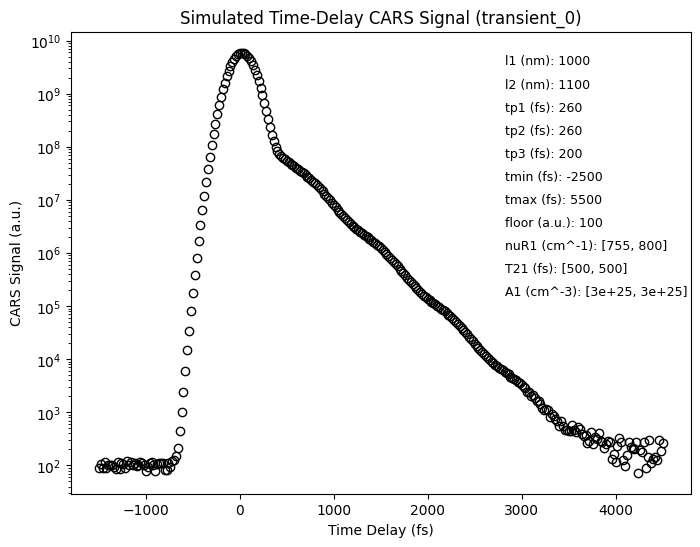

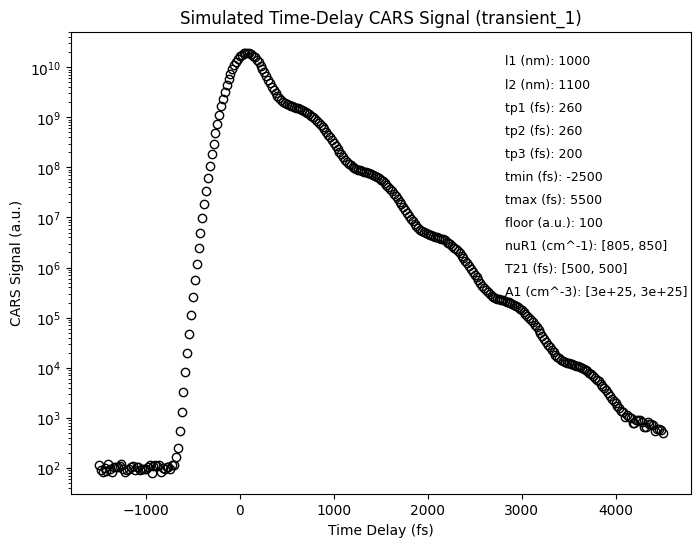

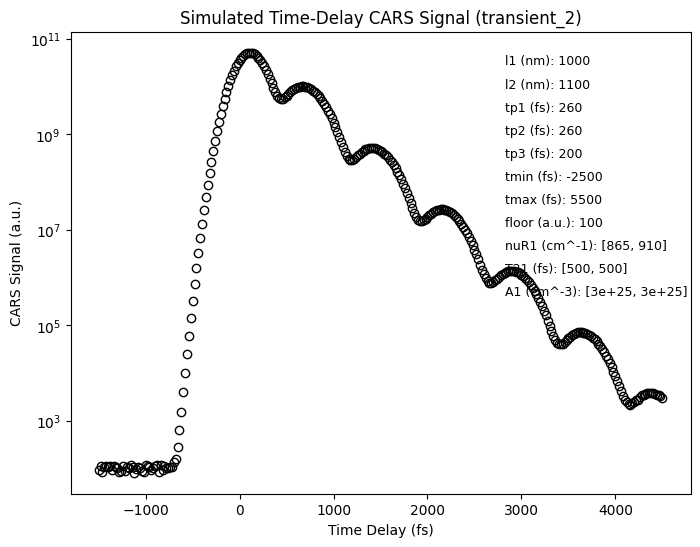

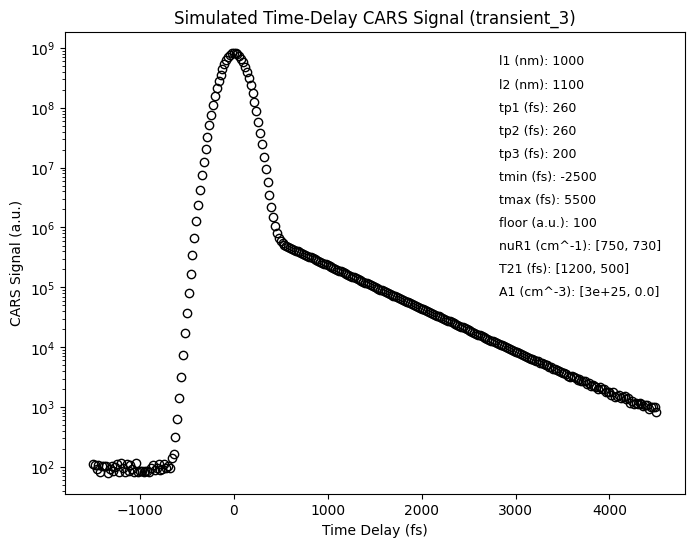

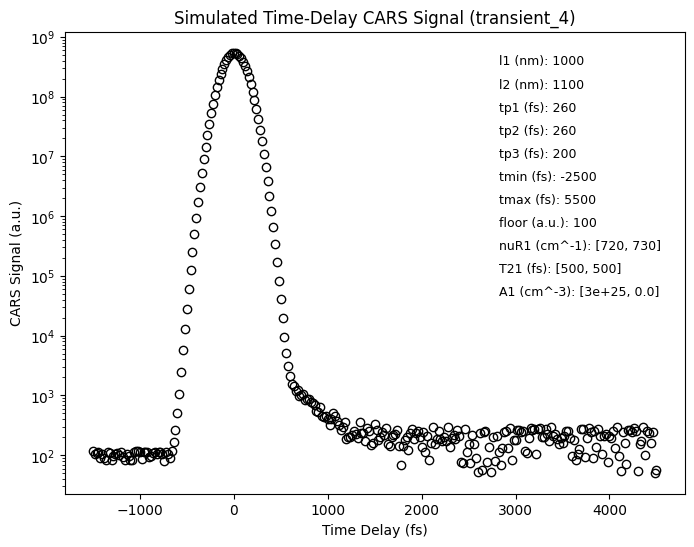

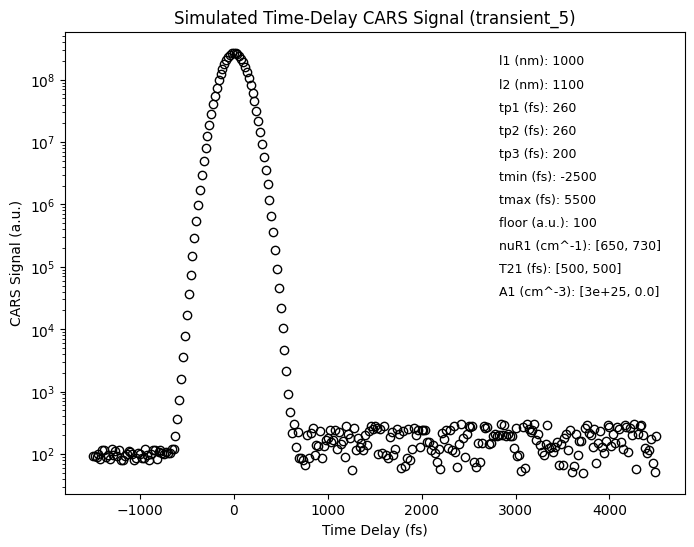

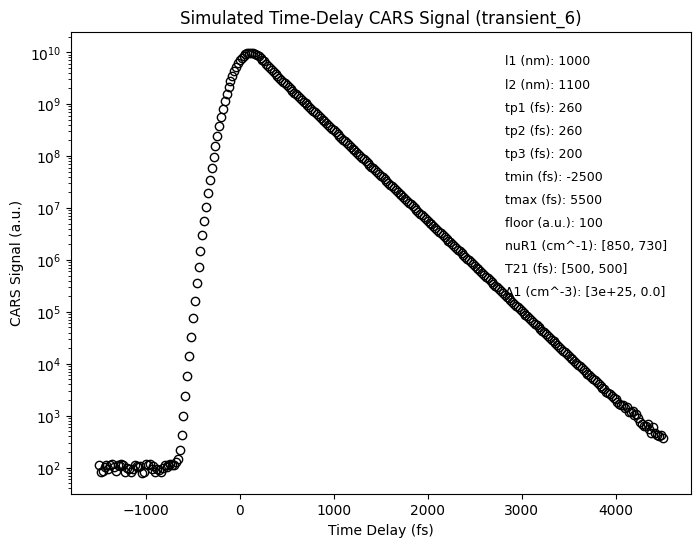

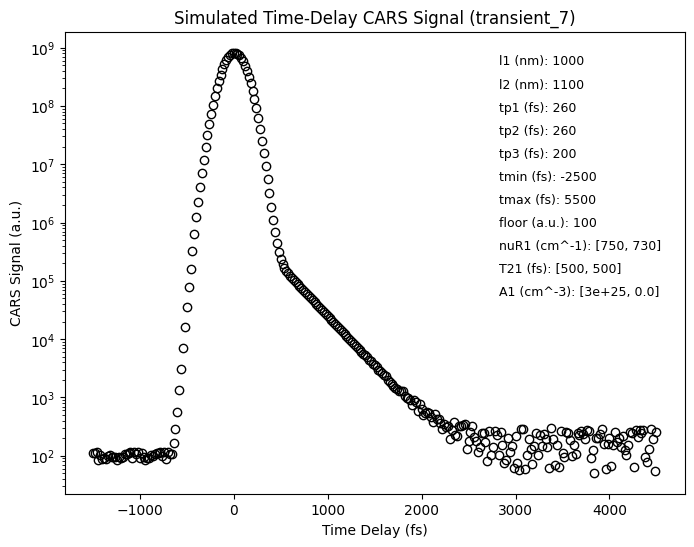

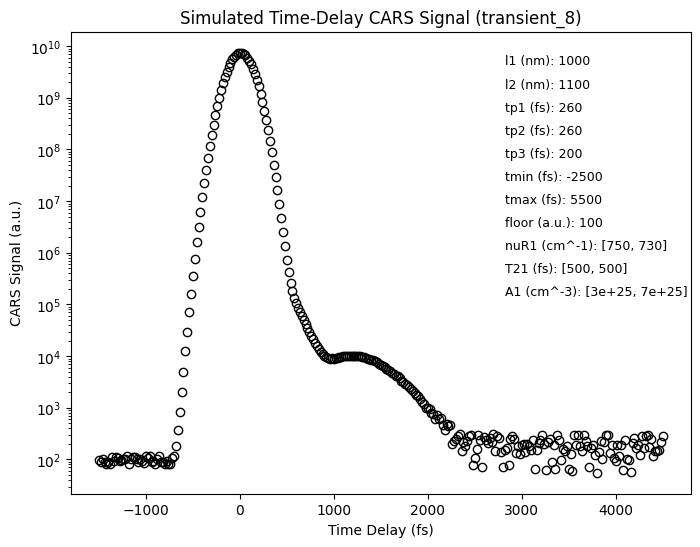

In [15]:
for j in range(len(tdCARS)):
    if True:
        td_FG, signal_FG = tdCARS[j].CARS_simulation_FG()
        td_FG_low_res, signal_FG_low_res = td_FG[::4], signal_FG[::4]

        hi_noise_level = np.random.randint(-50, 201, size=len(td_FG_low_res[(td_FG_low_res>0)]))
        low_noise_level = np.random.randint(-20, 20, size=len(td_FG_low_res)-len(hi_noise_level))
        noise_level = np.concatenate((low_noise_level, hi_noise_level))
        signal_FG_low_res += noise_level

        param_name = ['l1 (nm)', 'l2 (nm)', 'tp1 (fs)', 'tp2 (fs)', 'tp3 (fs)', 'tmin (fs)', 'tmax (fs)', 'floor (a.u.)', 'nuR1 (cm^-1)', 'T21 (fs)', 'A1 (cm^-3)']
        param_value = [tdCARS[j].wl1, tdCARS[j].wl2, tdCARS[j].tp1, tdCARS[j].tp2, tdCARS[j].tp3, tdCARS[j].tmin, tdCARS[j].tmax, tdCARS[j].floor, str(tdCARS[j].nuR1.tolist()), str(tdCARS[j].T21.tolist()), str(tdCARS[j].A1.tolist())]

        fig = plt.figure(figsize=(8,6))
        plt.semilogy(td_FG_low_res, signal_FG_low_res, 'ko', mfc='none')
        plt.xlabel('Time Delay (fs)')
        plt.ylabel('CARS Signal (a.u.)')
        plt.title(f'Simulated Time-Delay CARS Signal (transient_{j})')
        for i in range(len(param_name)):
            plt.text(0.7, 0.95 - i*0.05, f'{param_name[i]}: {param_value[i]}', transform=plt.gca().transAxes, fontsize=9, verticalalignment='top')
        plt.show()
        fig.savefig(f'tdCARS_mock_data/transient_{j}.png', dpi=300)

        #save the data and parameters
        np.savetxt(f'tdCARS_mock_data/transient_data_{j}.dat', np.column_stack((td_FG_low_res, signal_FG_low_res)), header='Time Delay (fs)    CARS Signal (a.u.)',delimiter='\t')
        np.savetxt(f'tdCARS_mock_data/transient_param_{j}.dat', np.column_stack((param_name, param_value)), fmt='%s', header='Prameter    Value')

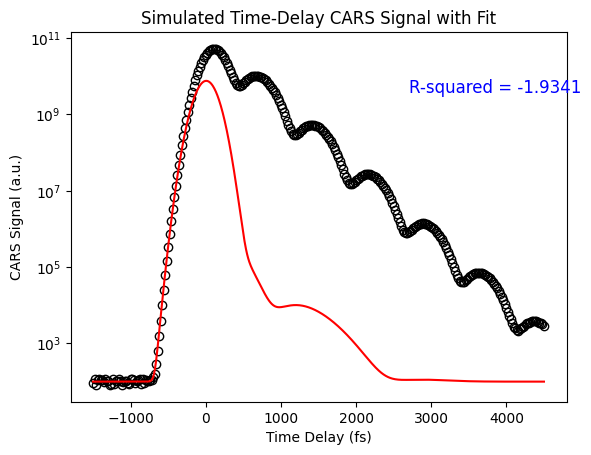

In [79]:
data = np.loadtxt('tdCARS_mock_data/transient_data_2.dat',skiprows=1, dtype=float, delimiter='\t')

tdCARS = TdCARS.from_params(1000, 1100, 260, 260, 200, -3000, 6000, 100, np.array([750,730]), np.array([500,500]), np.array([3e25, 7e25]),0)
td_FG, signal_FG = tdCARS.CARS_simulation_FG()
td_FG_short = td_FG[(td_FG >= np.min(data[:,0])) & (td_FG <= np.max(data[:,0]))]
signal_FG = signal_FG[(td_FG >= np.min(data[:,0])) & (td_FG <= np.max(data[:,0]))]
td_FG_low_res, signal_FG_low_res = td_FG_short[::4], signal_FG[::4] 

only_after_zero = True
x_exp, y_exp = data[:,0], np.log(data[:,1])
x_fit, y_fit = td_FG_low_res, np.log(signal_FG_low_res)
if only_after_zero:
    mask_exp = x_exp >= 0
    x_exp, y_exp = x_exp[mask_exp], y_exp[mask_exp]
    mask_fit = x_fit >= 0
    x_fit, y_fit = x_fit[mask_fit], y_fit[mask_fit]
#calculate R-squared
ss_res = np.sum((y_exp - np.interp(x_exp, x_fit, y_fit))**2)
ss_tot = np.sum((y_exp - np.mean(y_exp))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.semilogy(data[:,0], data[:,1], 'ko', mfc='none')
plt.semilogy(td_FG_short, signal_FG, 'r-')
plt.text(0.6*max(td_FG_short), 0.5*max(signal_FG), f'R-squared = {r_squared:.4f}', fontsize=12, color='blue')
plt.xlabel('Time Delay (fs)')
plt.ylabel('CARS Signal (a.u.)')
plt.title('Simulated Time-Delay CARS Signal with Fit')
plt.show()

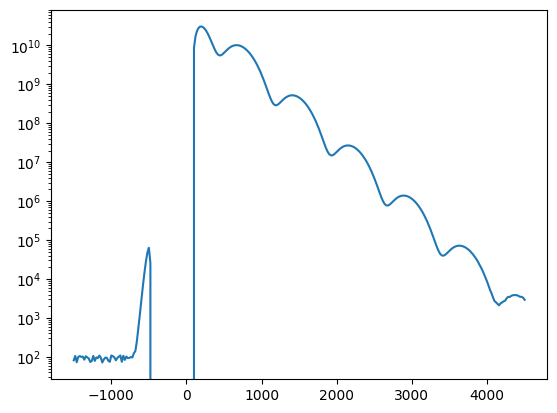

In [100]:
t, y = data[:,0], data[:,1]
y_NRB = 10 + 7e10 * np.exp(-t**2/20000)
plt.semilogy(t,y-y_NRB)

(-0.0003, 0.0003)

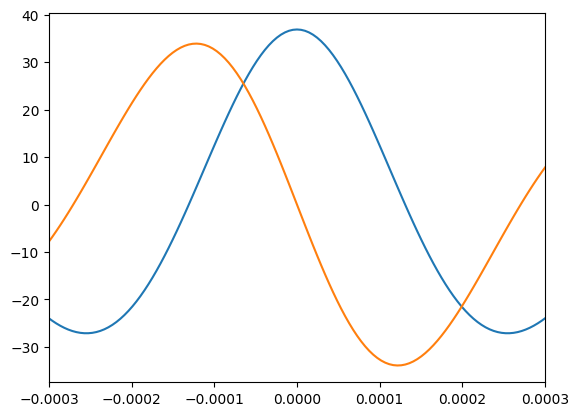

In [105]:
#y = y-y_NRB
y_pad = np.append(y, np.zeros(10000))

y_fft = np.fft.fftshift(np.fft.fft(np.sqrt(y_pad/np.max(y_pad))))
freq_array = np.fft.fftshift(np.fft.fftfreq(len(y_fft), d=(t[1]-t[0])))

plt.plot(freq_array,np.real(y_fft))
plt.plot(freq_array,np.imag(y_fft))
plt.xlim([-0.0003, 0.0003])

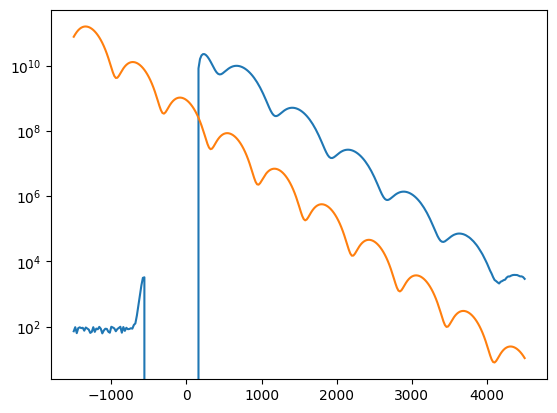

In [99]:
plt.semilogy(t, y)
f = 2
T2 = 500
plt.semilogy(t, np.abs(2e4*np.exp(-t/T2)*np.exp(1j*t*f)+1e4*np.exp(-t/T2)*np.exp(1j*t*(f+0.01)))**2)

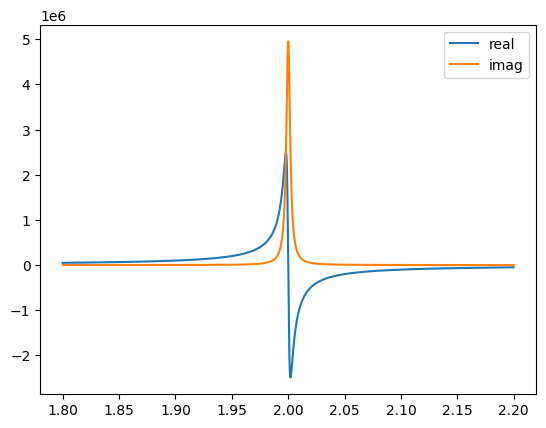

In [71]:
freq = np.linspace(1.8, 2.2, 1000)
chi3 = 1e4/(f-freq-1j/T2)
plt.plot(freq, np.real(chi3), label='real')
plt.plot(freq, np.imag(chi3), label='imag')
plt.legend()

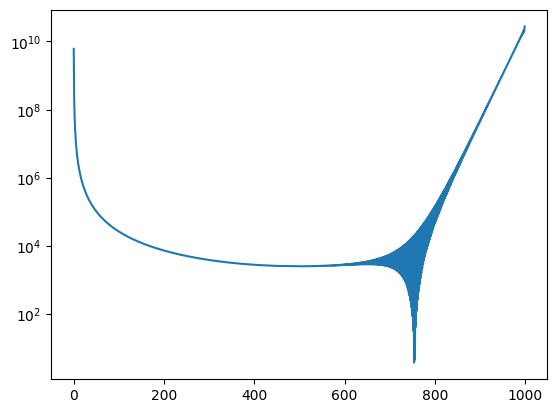

In [74]:
chi3_t = np.fft.ifft(chi3)
plt.semilogy(np.abs(chi3_t)**2)

(2.95, 3.05)

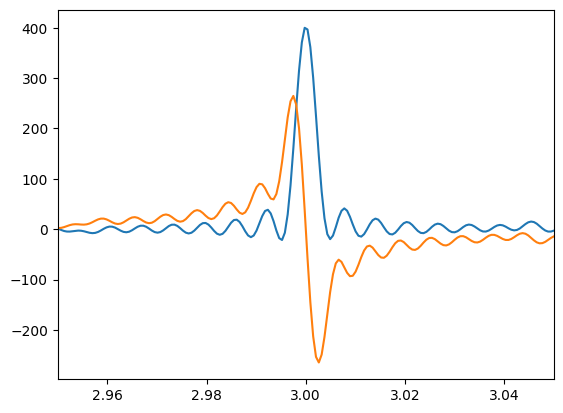

In [121]:
t = np.linspace(0,1000,1000)
a = np.exp(-t/T2)*np.exp(1j*3*t)
#plt.plot(t, np.abs(a)**2)
a_pad = np.append(a, np.zeros(10000))
a_fft = np.fft.fftshift(np.fft.fft(np.sqrt(a_pad/np.max(a_pad))))
freq_array = np.fft.fftshift(np.fft.fftfreq(len(a_fft), d=(t[1]-t[0]))) * 2 * np.pi
plt.plot(freq_array, np.real(a_fft))
plt.plot(freq_array, np.imag(a_fft))
plt.xlim([2.95,3.05])